### **Introduction:**

Ideas, creativity, and execution are essential for a start-up to flourish. But are they enough? Investors provide start-ups and other entrepreneurial ventures with the capital---popularly known as "funding"---to think big, grow rich, and leave a lasting impact. In this project, you are going to analyse funding received by start-ups in India from 2018 to 2021. You will find the data for each year of funding in a separate csv file in the dataset provided. In these files you'll find the start-ups' details, the funding amounts received, and the investors' information.


### **Scenario:**
My team Has been tasked with analyzing the Indian Startup Ecosystem. The analysis should provide insight as to the best course of action for the company.

### **Task:**

Our task is to develop a unique story from this dataset by stating and testing a hypothesis, asking questions, perform analysis and share insights with appropriate visualisations.

# **INDIAN STARTUP ECOSYSTEM ANALYSIS 2018 - 2021**

# **1. Business Understanding**

To be able to understand anything, We must first break it apart and examine it's components before we understand how it works as a whole. The task is to perform an analysis of the 'Indian Start-Up Ecosystem', but what exactly do each of these mean? Let's dive into the definitions of each of the elements in the task;

#### **Definitions** ####
##### **Ecosystem:**
In natural sciences, ‘ecosystems’ are generally defined as a system, or a group of interconnected elements, formed by the interaction of a community of organisms with their environment. 

##### **Startup:**
A startup or start-up is a company or project undertaken by an entrepreneur to seek, develop, and validate a scalable business model. Startups are new businesses that intend to grow large beyond the solo founder. At the beginning, startups face high uncertainty and have high rates of failure, but a minority of them do go on to become successful and influential.

##### **India:** 
India is a country that occupies the greater part of South Asia. India is made up of 28 states and eight union territories, and its national capital is New Delhi. It is the seventh-largest country by area and the most populous country as of June 2023.

#### **So What is a Start-Up Ecosystem and why should we care?**

A startup ecosystem is community of people, startups in their various stages and various types of organizations (funders, governments, etc) in a location (physical or virtual), interacting as a system to create and scale new startups. 

Neither biological nor startup ecosystems can be created, designed or built by an outside actor. While this makes the term ‘start-up ecosystem’ hard to grasp, it does underline that start-ups operate in complex and highly dynamic environments. For this reason, it is particularly important to take sufficient time to analyse and understand the ecosystem before designing interventions to partake in it.

Just like biological ecosystems, a startup ecosystem consists of different elements, which can be individuals, groups, organisations and institutions that form a community by interacting with one another, but also environmental determinants that have an influence on how these actors work and interconnect; in startup ecosystems, these can be laws and policies or cultural norms.

![**A Start-Up Ecosystem**](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/StartupEcosystem.png/300px-StartupEcosystem.png)

#### **Previous Studies / Research**

In nature, for any and all participants to thrive, the ecosystem must be healthy and in balance. For a company this could be the best indicator for whether to invest in an ecosystem or not. Previous studies and researchers have identified 5 key aspects of an ecosystem that can be tracked to measure it's vibrance and and these are:


**1. What is the Density and ecosystem value?**  \
A first step to mapping an ecosystem is to look at its actual size, growth, and value. This can be tracked by the number of new startups founded in a region during a specific period but also the total combined valuation of all these companies over time, and even break them down by funding year to monitor each cohort. Looking at the number of exits, especially the larger ones are also an interesting indicator of startup success.

**2. How does the Funding activity look in the Ecosystem?** \
To assess the health of a startup ecosystem we need to have an eye on the quality, quantity, and ease of access to funding. To evaluate the ease of access to funding, start tracking early-stage funding rounds. Their volume and growth over time will let us know if start-ups are getting the support they need to take their business off the ground. The location of the investors will help you to identify foreign VCs already investing in your Indian startup ecosystem and allow us to build bridges for potential collaboration and partnerships.

**3. Market reach and scaling opportunities** \
The easiest way to gauge the success of your startups is to watch the unicorns (measured in terms of companies valued at over $1 billion) in your ecosystem. Although it may be a metric not relevant in the future (due to the increase in number of unicorns), it remains an interesting indicator of startup ecosystem success.

**4.Knowledge and innovation** \
Innovation and entrepreneurship often flourish alongside world-class knowledge institutes and R&D incentives. These institutions often foster high-impact innovation, collaboration, and success across sectors. You can measure the level of innovation and new technology in your local ecosystem through research and patent activity, and by keeping tabs on the number of spinouts your local knowledge institutions produce. 

**5. Connectedness, Talent, Diversity, and more…** \
A vibrant ecosystem is not simply a collection of isolated elements, the connections between the elements matter just as much as the elements themselves. The metrics for connectedness and access to quality and diverse talent are a little more complex. You could however look out for the number of accelerators & incubators in your region, on job boards to access the type of talent your startups are looking for the most and on investment heatmaps to understand the breadth of various industries or depth of expertise present in your community.

### **Business Objective** 
To find out whether to invest in the Indian start-up ecosystem or not.

#### **Hypothesis**
Null - The Indian Startup Ecosystem is healthy and worth an investment\
Alternative  - The Indian Startup Ecosystem is weak and not worthy of investment

#### **Key Questions**

Using metrics similar to those of previous researchers enables the company to easily compare the Indian case with other global thereby giving the company a broader worldview and the ability to make a more informed decision. 
This is to mean our Key questions will be influenced heavily by the body of previous research.

**1. What is the Total Value of the Indian Startup Ecosystem?**
* How Many startups were founded in the period
* How Much Money has the ecosystem received in funding 

**2. How has the Ecosystem changed over time?**
* What is the change in performance year on year
* Which region has the best performance

**3. What is the Success rate of Start-ups in the ecosystem?**
* Are there any unicorns from the ecosystem
* How Many Unicorns

**4. Who is already in the Ecosystem?**
* How many companies are already involved in the ecosystem
* What fields are they invested in

**5. Which is the best performing sector in the ecosystem?**
* Sector with highest amount raised
* Sector with most start-ups


#### **Success Criteria**

1. To produce a dashboard that showcases the metrics monitoring the health of the Indian Start-up Ecosystem.
2. To provide an objective metric that can be used to compare with other startup ecosystems.
3. If decision is to invest, to provide guidance on the best path of investment into the Indian Startup Ecosystem.

# **2. Data Understanding**

## **2.1: Data Preparation**

### **2.1.1: Importations**

In [1]:
# import all necessary libraries
import os
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from thefuzz import process, fuzz


#remove pandas display limits
pd.set_option('display.max_columns', None)

#hide warnings
import warnings

warnings.filterwarnings('ignore')


#confrimation all libraries loaded
print("all libraries loaded successfully")

all libraries loaded successfully


### **2.1.2: Database Connection**

In [2]:
#reading data from database
#Load environment variables from .env file into a dictionary variable
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DB_NAME")
server = environment_variables.get("SERVER_NAME")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#Connecting to the database
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Using the connect method of the pyodbc library.
# This will connect to the server. 
connection=pyodbc.connect(connection_string)

print("connected successfully")

connected successfully


### **Note:** If the connection stops working, try restarting the kernel

#### **2.1.3: Reading the Data**

##### *YEAR: 2018*

In [3]:
# import 2018 data from GitHub
# Available from Azubi Africa Career Accelerator LP1 Repository as csv

df_2018 = pd.read_csv("https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv")

df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


##### *YEAR: 2019*

In [4]:
# import 2019 data from csv
df_2019 = pd.read_csv("datasets\startup_funding2019.csv")
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


##### *YEAR: 2020*

In [5]:
#reading the 2020 SQL table into a dataframe

query='''SELECT * 
        FROM dbo.LP1_startup_funding2020'''
        
df_2020=pd.read_sql(query,connection)

df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


##### *YEAR: 2021*

In [6]:
#reading the 2021 SQL table into a dataframe

query='''SELECT * 
        FROM dbo.LP1_startup_funding2021'''
        
df_2021=pd.read_sql(query,connection)

df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


**Notes:** \
    1. The data for each year is saved in variables named 'df_year'

## **2.2: Exploratory Data Analysis**

The data provided is expected to have the following columns to be used in the analysis:


|  | **COLUMN NAME** | **DESCRIPTION** | **EXPECTED DATATYPE** |
|--|-----------------|-----------------|-----------------------|
|**1**| **Company** | Name of the company/start-up | Object |
|**2**| **Founded** | Year start-up was founded | Int |
|**3**| **Sector** | Sector/ Industry | Category |
|**4**| **Description** | Description about Company | Object |
|**5**| **Founders** | Founders of the Company | Object |
|**6**| **Investor** | Investors | Category |
|**7**| **Amount** | Raised funds | Int |
|**8**| **Stage** | Round of funding reached | Category |
|**9**| **Location** | City/ Region of Startup | Category |

**Key Assumption**
Based on our business understanding and the key questions asked, we have created the expected datatype column to guide our EDA

In [7]:
#checking the 2018 info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [8]:
#checking 2019 info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [9]:
#checking 2020 info
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [10]:
#checking 2021 info
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


##### **Notes:** #####
1. The 2018 Dataset has less columns than the expected and all in the object datatype.
2. The 2019 and 2021 datasets have all expected and similar datatypes across columns the Founded column.
3. The 2020 dataset has more columns than expected and two columns in the expected datatypes (Founded and Amount).


##### **Decisions:** #####
We will clean all years' data separately as the columns are not in expected datatypes.\
To identify each data with year collected, we will add a year column to all datasets.

In [11]:
#adding a year column to identify each year's data
df_2018['year'] = 2018
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021

## **Collaboration Tip:**
Clean the data with a focus of creating a dataframe with an info like the Expected table above.

**Reference:** \
Effective Pandas by Matt Harrison - https://www.youtube.com/watch?v=zgbUk90aQ6A&t=4084s

## **2018 CLEANING**

In [12]:
#checking if column names are as expected
(df_2018
.columns)

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'year'],
      dtype='object')

**Observations:**
    The column names are not as expected.\
**Decision**
    Check further on items in the columns.

In [13]:
#Checking columns
cols = ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location','About Company', 'year']

(df_2018
 [cols]
)

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


**Observation:**
1. The dataframe has 6 columns as opposed to the Expected 9. There is probably some missing/incomplete data from 2018.
2. The column names are similar/same to those expected.

In [14]:
#checking nulls
(df_2018
.isnull()
.sum())

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
year             0
dtype: int64

**Observation**
There are no nulls. So the DataFrame is missing some expected columns. Probably they weren't recorded.

In [15]:
#checking dtypes
(df_2018
 [cols]
 .dtypes)

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
year              int64
dtype: object

**Observation:**
The datatypes are not as expected for Industry, Amount and Round/Series columns.\
**Decision**
Delve further into the columns 

In [16]:
(df_2018
 [['Industry','Amount','Round/Series']]
 .describe()
 )

,Industry,Amount,Round/Series
count,526,526,526
unique,405,198,21
top,—,—,Seed
freq,30,148,280


#### **Amount Column Cleaning**

In [17]:
#Dealing with the Amount Column
(df_2018
 ['Amount']
 .values
 )

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '—', '—', '—', '—', '—', '—', '—',
       '₹100,000,000', '150000', '1100000', '—', '₹500,000', '6000000',
       '650000', '₹35,000,000', '₹64,000,000', '—', '—', '2000000',
       '2000000', '2000000', '—', '₹20,000,000', '1000000', '—', '650000',
       '1000000', '5000000', '4000000', '₹30,000,000', '1000000',
       '2800000', '—', '150000', '₹40,000,000', '1000000', '1700000', '—',
       '1300000', '2000000', '—', '₹5,000,000', '₹20,000,000',
       '₹40,000,000', '₹20,000,000', '1000000', '₹12,500,000',
       '₹15,000,000', '500000', '5000000', '₹104,000,000', '₹45,000,000',
       '13400000', '—', '500000', '—', '₹25,000,000', '—', '₹26,400,000',
       '—', '—', '₹8,000,000', '₹60,000', '4000000', '9000000', '—',
       '100000', '20000', '—', '1000000', '—', '4000000', '250000', '—',
       '120000', '₹34,000,000', '—', '₹342,000,000', '$143,145', '—',
       '₹600

**Observations:**
1. There are multiple currency symbols in the column.\
    Decision: Extract the currency symbols and put in a separate column
2. There are commas in some values.\
    Decision: Remove the commas 
3. There are '-' in some rows\
    Decision: replace them with Nan 

In [18]:
#defining a function to extract the currrency symbols
def extract_currency(df, column_name, curr_char):
    """
    Checks if values in the specified column that start with the given currency character.
    If they do, extracts the currency character and saves it in a new column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to check.
        curr_char (str): The special character to look for.

    Returns:
        pandas.DataFrame: The modified DataFrame with the new column.
    """
    # Check if values start with the specified special character
    mask = df[column_name].str.startswith(curr_char)

    # Create a new column with the extracted special character
    df['Currency'] = df.loc[mask, column_name].str[0]

    return df

#extracting and saving the currency symbols to a new column
extract_currency(df_2018, 'Amount', curr_char=('$','₹'))

,Company Name,Industry,Round/Series,Amount,Location,About Company,year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,NaN
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,₹


In [19]:
#cleaning the amount column and changing to float datatype
df_2018['Amount'] = (df_2018
                     ['Amount']
                     .str
                     .replace(',|\$|₹','', regex= True) #Remove the comma sign and the currency symbols
                     .replace('—', np.NaN, regex=True) #Replace the - with Null
                     .astype(float) #changing to float datatype
                     )
df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,NaN
524,Droni Tech,Information Technology,Seed,35000000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,₹


**Observations:**
The Amounts are in differenct currencies.\
**Decision:**
Convert all Ruppee amounts to USD

* **Key Assumption**: We assume that all amounts without a currency symbol are in USD

In [20]:
#converting ₹ to dollars.
def currency_converter(df, target, check, rate = 0.012):
    '''A function to convert the values of received in Rupees to Dollars.
    It checks the currency symbol from one column and them multiplies the target column with the conversion rate
    
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        target (str): The name of the column to convert.
        check (str): The name of the column to check currency symbol.
        rate (float): The conversion rate.

    Returns:
        pandas.DataFrame: The modified DataFrame.
    '''
    # Conversion rate of 1 ruppee to dollar in 2018 was = 0.012 
    
    # Check if the currency symbol matches the desired currency
    mask = df[check] == '₹'  # Modify this condition as needed

    # Multiply the amount column by the exchange rate for matching rows
    df.loc[mask, target] *= rate

    return df

#converting all ruppee amounts to usd
currency_converter(df=df_2018, target='Amount', check='Currency')

,Company Name,Industry,Round/Series,Amount,Location,About Company,year,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,NaN
524,Droni Tech,Information Technology,Seed,420000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,₹


In [21]:
#dropping the deprecated Currency column
(df_2018
 .drop(columns='Currency', inplace = True)
 )

df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [22]:
df_2018['Amount'] = (df_2018
                     ['Amount']
                     .fillna(0) #filling na with 0 to represent unknown
                     .astype('float')
                     )
df_2018.Amount

0         250000.0
1         480000.0
2         780000.0
3        2000000.0
4              0.0
          ...     
521    225000000.0
522            0.0
523         7500.0
524       420000.0
525     35000000.0
Name: Amount, Length: 526, dtype: float64

#### **Series Column Cleaning**

In [23]:
# checking the unique values in the column
df_2018['Round/Series'].value_counts()

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

**Observation:**
There is a google link which could causing the datatype to be different from expected\
**Decision**
clear it

In [24]:
#Cleaning the column
df_2018['Stage'] = (df_2018
                     ['Round/Series']
                     .str
                     .replace(r'http\S+|www\S+', '', regex=True) #cleaning the url and replacing with space
                     .str
                     .strip() # removing empty space
                     .astype('category') #converting to categorical datatype
                     )

df_2018['Stage'].value_counts() #confirming the url has been removed

Stage
Seed                        280
Series A                     73
Venture - Series Unknown     37
Angel                        37
Series B                     20
Series C                     16
Debt Financing               13
Private Equity               10
Corporate Round               8
Pre-Seed                      6
Series E                      5
Grant                         4
Post-IPO Equity               3
Secondary Market              3
Series D                      3
Post-IPO Debt                 2
Undisclosed                   2
Non-equity Assistance         1
Funding Round                 1
Series H                      1
                              1
Name: count, dtype: int64

In [25]:
#dropping the deprecated Round/Series column
(df_2018
 .drop('Round/Series', axis = 1, inplace=True)
 )

df_2018

,Company Name,Industry,Amount,Location,About Company,year,Stage
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Seed
1,Happy Cow Dairy,"Agriculture, Farming",480000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Seed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",780000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Series A
3,PayMe India,"Financial Services, FinTech",2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Angel
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Seed
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",225000000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,Series C
522,Happyeasygo Group,"Tourism, Travel",0.0,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,Series A
523,Mombay,"Food and Beverage, Food Delivery, Internet",7500.0,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,Seed
524,Droni Tech,Information Technology,420000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,Seed


In [26]:
#confirming datatypes are as expected
df_2018.dtypes

Company Name       object
Industry           object
Amount            float64
Location           object
About Company      object
year                int64
Stage            category
dtype: object

#### **Industry Column Cleaning**

In [27]:
#checking unique industries
df_2018['Industry'].value_counts()

Industry
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64

In [28]:
#overview of column
df_2018['Industry']

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Industry, Length: 526, dtype: object

**Observations:**
There are multiple items stacked in the column. May make it confusing to know exact industries\
**Decision** 
Split to each individual industry description and maintain only one

**Key Assumption:**
We assume that the first industry description is the primary industry and ignore the rest

In [29]:
#cleaning the industry column
df_2018['Industry'] = (df_2018
                       ['Industry']
                       .str
                       .split(',', expand=True) #split the descriptions separated by comma
                       .pop(0) #pop only the first description
                       .astype('category')
                       )

df_2018['Industry'].value_counts()

Industry
—                                     30
Health Care                           26
Financial Services                    26
E-Commerce                            22
Apps                                  20
                                      ..
Environmental Consulting               1
Enterprise Software                    1
Enterprise Resource Planning (ERP)     1
Embedded Systems                       1
3D Printing                            1
Name: count, Length: 148, dtype: int64

**Note:**
The value_counts of each industry has increased meaning it can be

#### **Location Column Cleaning**

In [30]:
#overview of column
df_2018['Location']

0           Bangalore, Karnataka, India
1            Mumbai, Maharashtra, India
2               Gurgaon, Haryana, India
3           Noida, Uttar Pradesh, India
4      Hyderabad, Andhra Pradesh, India
                     ...               
521         Bangalore, Karnataka, India
522             Haryana, Haryana, India
523          Mumbai, Maharashtra, India
524          Mumbai, Maharashtra, India
525          Chennai, Tamil Nadu, India
Name: Location, Length: 526, dtype: object

* Just like Industry, the column has multiple values separated by comma. In this case it is geographical regions.\
They could come in handy. 

**Decision**
Split into separate columns and assign them to city, region and country columns respectively

In [31]:
#splitting Location column and reassigning to city, region and country
df_2018[['City', 'Region', 'Country']]=(df_2018
                                      ['Location']
                                      .str
                                      .split(',', expand=True) #split columns
                                      .astype('category') #changing to category datatype
                                      )
#drop the deprecated Location column
df_2018 = (df_2018
           .drop(columns='Location'))

df_2018

,Company Name,Industry,Amount,About Company,year,Stage,City,Region,Country
0,TheCollegeFever,Brand Marketing,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Seed,Bangalore,Karnataka,India
1,Happy Cow Dairy,Agriculture,480000.0,A startup which aggregates milk from dairy far...,2018,Seed,Mumbai,Maharashtra,India
2,MyLoanCare,Credit,780000.0,Leading Online Loans Marketplace in India,2018,Series A,Gurgaon,Haryana,India
3,PayMe India,Financial Services,2000000.0,PayMe India is an innovative FinTech organizat...,2018,Angel,Noida,Uttar Pradesh,India
4,Eunimart,E-Commerce Platforms,0.0,Eunimart is a one stop solution for merchants ...,2018,Seed,Hyderabad,Andhra Pradesh,India
...,...,...,...,...,...,...,...,...,...
521,Udaan,B2B,225000000.0,"Udaan is a B2B trade platform, designed specif...",2018,Series C,Bangalore,Karnataka,India
522,Happyeasygo Group,Tourism,0.0,HappyEasyGo is an online travel domain.,2018,Series A,Haryana,Haryana,India
523,Mombay,Food and Beverage,7500.0,Mombay is a unique opportunity for housewives ...,2018,Seed,Mumbai,Maharashtra,India
524,Droni Tech,Information Technology,420000.0,Droni Tech manufacture UAVs and develop softwa...,2018,Seed,Mumbai,Maharashtra,India


#### **Final Touches**

In [32]:
df_2018 = (df_2018
           .drop_duplicates() #dropping duplicates
           .drop(columns=['Country','Region']) #drop Country and region column
           .rename(columns = {'Company Name': 'company', 'Industry': 'sector', 
                              'About Company': 'description', 'City': 'location',
                              'Amount':'amount','Stage':'stage'}) #rename columns
           ) 

df_2018.dtypes

company          object
sector         category
amount          float64
description      object
year              int64
stage          category
location       category
dtype: object

## **2019 CLEANING**

In [33]:
#checking if columns are as expected
(df_2019
 .columns
 )

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year'],
      dtype='object')

In [34]:
#checking nulls
(df_2019
.isnull()
.sum())

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
year              0
dtype: int64

* There are nulls in 5 columns. dive further into each column

In [35]:
#checking dtypes
(df_2019
.dtypes)

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
year               int64
dtype: object

* The founded column is already in the expected datatype. The other columns need to be checked and cleaned.

#### **Amount Column Cleaning**

In [36]:
(df_2019
 ['Amount($)']
 .unique()
 )

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

* The columns have a currency symbol and commas separating the values. There is also 'Undisclosed' text.

**Decision** To clean the currency symbol and comma and replace undisclosed with None

In [37]:
df_2019['Amount($)'] = (df_2019
                     ['Amount($)']
                     .str
                     .replace(',|\$','', regex= True) #Remove the comma sign and the currency symbols
                     .replace({'Undisclosed' : None}, regex=True) # replacing Undisclosed with None
                     .astype(float) #converting to float
                     )
df_2019['Amount($)']

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

#### **Investor Column Cleaning**

In [38]:
df_2019['Investor'] = (df_2019
                       ['Investor']
                       .astype('category') #converting to category dtype
                       )
df_2019.Investor

0                                  Sixth Sense Ventures
1                                      General Atlantic
2        Deepak Parekh, Amitabh Bachchan, Piyush Pandey
3     Evolvence India Fund (EIF), Pidilite Group, FJ...
4              Innovation in Food and Agriculture (IFA)
                            ...                        
84    Tiger Global, Nexus Venture Partners, Accel Pa...
85    MyPreferred Transformation, Avendus Finance, S...
86                                      Sequoia Capital
87    Norwest Venture Partners, General Catalyst, Fu...
88       TPG, Norwest Venture Partners, Evolvence India
Name: Investor, Length: 89, dtype: category
Categories (86, object): ['AC Ventures, Henkel', 'Alibaba', 'Alteria Capital', 'Amplo, FJ Labs, Rogue One Capital', ..., 'Wilson Global Opportunities Fund', 'Windrose Capital', 'Work10M, Michael and Susan Dell Foundation, E..., 'Zoomcar Inc']

#### **Headquarter Column Cleaning**

In [39]:
df_2019['HeadQuarter'] = (df_2019
                       ['HeadQuarter']
                       .fillna('Unknown') #filling na with unknown
                       .astype('category') #converting to category
                    )
df_2019.HeadQuarter

0       Unknown
1        Mumbai
2        Mumbai
3       Chennai
4     Telangana
        ...    
84       Mumbai
85     Gurugram
86        Delhi
87        Delhi
88    Rajasthan
Name: HeadQuarter, Length: 89, dtype: category
Categories (18, object): ['Ahmedabad', 'Bangalore', 'Chandigarh', 'Chennai', ..., 'Surat', 'Telangana', 'Unknown', 'Uttar pradesh']

* converting to category reduces the entries to 17 categories instead of 89 entries

#### **Sector Column Cleaning**

In [40]:
df_2019['Sector'] = (df_2019
                     ['Sector']
                     .fillna('Unkonwn')
                     .astype('category') #converting to category
                    )
df_2019.Sector

0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: category
Categories (53, object): ['AI', 'AI & Tech', 'Accomodation', 'AgriTech', ..., 'Travel', 'Unkonwn', 'Virtual Banking', 'Yoga & wellness']

* converting to category makes the sector column more efficient since it has 52 objects instead of 89

#### **Stage Column Cleaning**

In [41]:
df_2019['Stage']= (df_2019
                   ['Stage']
                   .fillna('Unknown') #fill na with Unknown
                   .astype('category') #changing dtype to category
                   )

df_2019.Stage

0           Unknown
1          Series C
2     Fresh funding
3          Series D
4           Unknown
          ...      
84         Series A
85          Unknown
86         Series B
87          Unknown
88          Unknown
Name: Stage, Length: 89, dtype: category
Categories (16, object): ['Fresh funding', 'Post series A', 'Pre series A', 'Pre-series A', ..., 'Series E', 'Series F', 'Series G', 'Unknown']

* converting to category reduces the number to 15 categories instead of 89 entries
* The Nulls may represent undisclosed information so we fill with Undisclosed

#### **Founded Column Cleaning**

In [42]:
#Dealing with nulls
df_2019['Founded'] = (df_2019
                      ['Founded']
                      .fillna(0) #fill missing values with 0 to represent unknown
                      .astype('int') #converting to int
                      )
df_2019.Founded

0        0
1     2014
2        0
3     2014
4     2004
      ... 
84       0
85    2013
86    2016
87    2015
88       0
Name: Founded, Length: 89, dtype: int32

#### **Founders Column Cleaning**

In [43]:
df_2019['Founders'] = (df_2019
                       ['Founders']
                       .fillna('Unknown')
                       )
df_2019.Founders

0                                    Shantanu Deshpande
1                 Adamas Belva Syah Devara, Iman Usman.
2                                         Jatin Solanki
3                          Srikanth Iyer, Rama Harinath
4                                Narayana Reddy Punyala
                            ...                        
84                      Aaditya Sharda, Souvik Sengupta
85                                       Ritesh Agarwal
86    Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...
87    Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...
88                                       Rajendra Setia
Name: Founders, Length: 89, dtype: object

#### **Final Touches**

In [44]:
df_2019['Amount($)'] = (df_2019
                     ['Amount($)']
                     .fillna(0) # filling nulls with 0 to represent unknown
                     )

In [45]:
df_2019 = (df_2019
           .drop_duplicates() #dropping duplicates
           .rename(columns = {'Company/Brand': 'company', 'Investor':'investor', 
                              'What it does': 'description','Amount($)':'amount',
                              'Founders':'founders', 'Founded': 'founded','Stage':'stage',
                              'Sector':'sector','HeadQuarter':'location'}) #rename columns
           ) 

df_2019.dtypes

company          object
founded           int32
location       category
sector         category
description      object
founders         object
investor       category
amount          float64
stage          category
year              int64
dtype: object

## **2020 CLEANING**

In [46]:
#checking column types
(df_2020
 .head())

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [47]:
df_2020.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
year               int64
dtype: object

In [48]:
df_2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
year                0
dtype: int64

**Notes:**
1. Founded column is not in the correct data type
2. The dataset has all the expected columns. The HeadQuarter column should be Headquarter
3. There is a column (column 10) that is not required for the analysis - to be dropped.

In [49]:
# Drop the column10 column
df_2020 = (df_2020
           .drop(columns="column10")
           )
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [50]:
#checking the shapes of the dataframe
(df_2020
 .shape
 )

(1055, 10)

**Notes:**
1. The dataset has 1055 observations and 10 features, the number of features is more than expected.

In [51]:
# Check for missing values
df_2020.isna().sum()


Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           254
Stage            464
year               0
dtype: int64

**Observation:**
1. The data has A LOT of many missing values.

In [52]:
# Check for duplicates
df_2020.duplicated().sum()

3

**Observation:**
1. There are 3 duplicates in the data, which will be dropped

In [53]:
# Drop duplicates
df_2020 = (df_2020
           .drop_duplicates()
           )

#### **Note**
Dropping observations is not a solutions to this data cleaning; the problem will be approached in a different manner.

1. The missing values in the `Amount` column has been filled with `0s`
2. The missing values in the `Founded` columns will be filled with `0s` to represent unknown year.
3. All the missing values in the object columns will be filled with `Unknown`, this will ensure the integrity of the data.
4. Columns such as Sector, Investor and stage is having a wrong datatype. We have to convert them to the Categorical Dtype

#### **Amount Column Cleaning**

In [54]:
#filling the NaN values with 0
df_2020['Amount'] = (df_2020
                     ['Amount']
                     .fillna(0)
                     )
df_2020.Amount

0         200000.0
1         100000.0
2              0.0
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1052, dtype: float64

#### **Founded Column**

In [55]:
# Convert Founded to int dtype
df_2020['Founded'] = (df_2020
                      ['Founded']
                      .fillna(0)
                      .astype('int') #converting to int
                      )

df_2020.Founded

0       2019
1       2019
2       2018
3       2020
4       2016
        ... 
1050       0
1051       0
1052    2012
1053    2015
1054    2017
Name: Founded, Length: 1052, dtype: int32

#### **Founders Column**

In [56]:
#filling Founders na with unknown
df_2020['Founders'] = (df_2020
                       ['Founders']
                       .fillna('Unknown')
                       )
df_2020['Founders']

0                         Prasanna Manogaran, Bharani C L
1                        Saurabh Dixit, Gurudutt Upadhyay
2                                         Ajinkya Dhariya
3                                           Ritesh Tiwari
4       Ashish Rajan Singh, Harshit Gupta, Nishant Mah...
                              ...                        
1050                                    Akshay Chaturvedi
1051                      Sujith Narayanan, Sumit Gwalani
1052                            Manish Taneja, Rahul Dash
1053                        Amit Singh, Deepanshu Malviya
1054                       Jayakrishnan, Abhijeet Manohar
Name: Founders, Length: 1052, dtype: object

#### **Stage Column**

In [57]:
#filling the na with unknown
df_2020['Stage'] = (df_2020
                    ['Stage']
                    .fillna('Unknown') #filling with Unknown
                    .astype('category') #converting to category dtype
                    )


#### **HeadQuarter Column**

In [58]:
#filling na with unknown
df_2020['HeadQuarter'] = (df_2020
                          ['HeadQuarter']
                          .fillna('Unknown')
                          )

#### **Investor Column**

In [59]:
#filling na with unkown
df_2020['Investor'] = (df_2020
                       ['Investor']
                       .fillna('Unknown')
                       )

#### **Sector Column**

In [60]:
df_2020['Sector'] = (df_2020
                     ['Sector']
                     .fillna('Unknown')
                     )
df_2020['Sector']

0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1052, dtype: object

#### **Final Touches**

In [61]:
#confirming no nulls remain
df_2020.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
year             0
dtype: int64

In [62]:
# Converting the dtype of Sector, Stage, and Investor from Object to categorical.
for col in ['Sector', 'Investor', "Stage", "HeadQuarter"]:
    df_2020[col] = df_2020[col].astype('category')
    
df_2020.dtypes

Company_Brand      object
Founded             int32
HeadQuarter      category
Sector           category
What_it_does       object
Founders           object
Investor         category
Amount            float64
Stage            category
year                int64
dtype: object

In [63]:
#renaming all columns to expected column names
df_2020 = (df_2020
           .rename(columns = {'Company_Brand':'company','HeadQuarter':'location',
                              'Sector':'sector','What_it_does':'description',
                              'Founders':'founders','Investor':'investor', 'Amount':'amount',
                              'Stage':'stage', 'Founded':'founded'}) #renaming columns
           )
df_2020.dtypes

company          object
founded           int32
location       category
sector         category
description      object
founders         object
investor       category
amount          float64
stage          category
year              int64
dtype: object

## **2021 CLEANING**

In [64]:
df_2021.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2021
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2021
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2021


In [65]:
#checking datatypes
df_2021.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
year               int64
dtype: object

**Observations:**
Some columns aren't in the expected datatype.

In [66]:
#checking nulls
df_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
year               0
dtype: int64

**Observation:** 
There are missing values in most columns, we will fill/drop as appropriate

In [67]:
#check for duplicates
df_2021.duplicated().sum()

19

* There are 19 duplicate records. We will drop them

In [68]:
#drop duplicates
df_2021 = (df_2021
           .drop_duplicates()
           )
df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


#### **Founded Column Cleaning**

In [69]:
#checking for nulls
df_2021['Founded'].isna().sum()

1

In [70]:
df_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

* The Founded column has one null and the rest are correctly matched to int datatype
* We will fill the null with 0 to represent unknown

In [71]:
df_2021['Founded'] = (df_2021
                      ['Founded']
                      .fillna(0) #filling na with 0 to represent unknown
                      .astype('int') #converting to int
                      )
df_2021.Founded

0       2019
1       2015
2       2012
3       2015
4       2021
        ... 
1204    2019
1205    2015
1206    2019
1207    2015
1208    2019
Name: Founded, Length: 1190, dtype: int32

#### **HeadQuarter Column cleaning**

In [72]:
df_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

**Observations:**
The column has some unexpected values including potential sector names and what it does.

In [73]:
df_2021['HeadQuarter'] = (df_2021
                      ['HeadQuarter']
                      .fillna((df_2021.HeadQuarter.mode()[0])) #filling with mode
                      .replace('\t#REF!','', regex=True) #removing the \t#REF! in some cells
                      .astype('category') #converting to category
                      )
df_2021.HeadQuarter

0       Bangalore
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
1204     Gurugram
1205    New Delhi
1206    Bangalore
1207     Gurugram
1208    Bangalore
Name: HeadQuarter, Length: 1190, dtype: category
Categories (69, object): ['Ahmadabad', 'Ahmedabad', 'Ambernath', 'Andheri', ..., 'Thiruvananthapuram', 'Trivandrum', 'Vadodara', 'West Bengal']

#### **Sector Column Cleaning**

In [74]:
#checking unique entries
df_2021['Sector'].value_counts()

Sector
FinTech                  121
EdTech                   102
Financial Services        59
E-commerce                37
Food & Beverages          36
                        ... 
Home Decor                 1
TaaS startup               1
Beverages                  1
Manufacturing startup      1
Staffing & Recruiting      1
Name: count, Length: 254, dtype: int64

In [75]:
df_2021['Sector'] = (df_2021
                     ['Sector']
                     .astype('category') #converting to category
                    )

#### **Founders Column Cleaning**

In [76]:
#overview of the column
df_2021['Founders'].unique()

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Bala Sarda',
       'Arnav Kumar, Vaibhav Singh', 'Vishal Chopra, Himanshu Gupta'],
      dtype=object)

In [77]:
df_2021['Founders'] = (df_2021
                       ['Founders'] #renaming columns
                       .fillna('Unknown') #filling na with Unkown
                       )

#### **Investor Column Cleaning**

In [78]:
df_2021['Investor'] = (df_2021
                       ['Investor']
                       .fillna('Unknown') #filling na with Unknown
                       .astype('category')
                       )
df_2021.Investor.value_counts()

Investor
Unknown                                                61
Inflection Point Ventures                              23
Tiger Global                                           11
Venture Catalysts                                      11
Elevation Capital                                       7
                                                       ..
Hindustan Media Ventures                                1
Hitesh Oberoi, Lightbox                                 1
Hornbill Capital Advisers, Plutus Wealth Management     1
Hungama, Hindustan Talkies                              1
velocity.in                                             1
Name: count, Length: 938, dtype: int64

#### **Amount Column Cleaning**

In [79]:
df_2021['Amount']

0         $1,200,000
1       $120,000,000
2        $30,000,000
3        $51,000,000
4         $2,000,000
            ...     
1204        $3000000
1205       $20000000
1206       $55000000
1207       $26000000
1208        $8000000
Name: Amount, Length: 1190, dtype: object

In [80]:
df_2021['Amount'] = (df_2021
                     ['Amount']
                     .replace('\$|,','', regex=True) #replacing $ and comma with blank
                     .replace({'Undisclosed|undisclosed': 0}, regex=True) # replacing the Undisclosed with 0
                     )

df_2021.Amount.unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 0, '1000000', '3000000', '100000', '700000',
       '9000000', '40000000', '49000000', '400000', '300000', '25000000',
       '160000000', '150000', '1800000', '5000000', '850000', '53000000',
       '500000', '1100000', '6000000', '800000', '10000000', '21000000',
       '7500000', '26000000', '7400000', '1500000', '600000', '800000000',
       '17000000', '3500000', '15000000', '215000000', '2500000',
       '350000000', '5500000', '83000000', '110000000', '500000000',
       '65000000', '150000000000', '300000000', '2200000', '35000000',
       '140000000', '4000000', '13000000', None, '9500000', '8000000',
       'Upsparks', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16

**Observation:**
There are some values from other columns that are wrongly placed in the Amount column.\
**Decision:**
Check how many they are.

In [81]:
#checking columns where the amount is not a number
df_2021['Amount'][pd.to_numeric(df_2021['Amount'], errors='coerce').isnull()]

86                                None
98                            Upsparks
242                           Series C
257                               Seed
538                       ah! Ventures
545                       Pre-series A
551      ITO Angel Network LetsVenture
674                               None
677     JITO Angel Network LetsVenture
1100                              None
1137                                  
1146                                  
1148                              Seed
Name: Amount, dtype: object

* There are 13 instances where the amount column is not a number.
* Some are mismatched columns with the stage column and some are mismatched with the and others are undefined. 

**Decision:**
To drop the rows as they are few and won't affect the overall dataset.

In [82]:
#making a dataset where the mismatchd columns have been removed
df_2021= df_2021[~pd.to_numeric(df_2021['Amount'], errors='coerce').isnull()]

In [83]:
#converting Amount column to float type
df_2021['Amount'] = (df_2021
                     ['Amount']
                     .astype('float'))
df_2021.Amount

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1177, dtype: float64

#### **Stage Column Cleaning**

In [84]:
#filling na with unknown
df_2021['Stage'] = (df_2021
                    ['Stage']
                    .fillna('Unknown') #filling with unknown
                    .astype('category') #changing to category type
                    )

In [85]:
#checking unique values
df_2021['Stage'].unique()

['Pre-series A', 'Unknown', 'Series D', 'Series C', 'Seed', ..., 'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I']
Length: 28
Categories (28, object): ['Bridge', 'Debt', 'Early seed', 'PE', ..., 'Series G', 'Series H', 'Series I', 'Unknown']

#### **Final Touches**

In [86]:
#confirming all nulls have been removed
df_2021.isna().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
year             0
dtype: int64

In [87]:
#checking dtypes
df_2021.dtypes

Company_Brand      object
Founded             int32
HeadQuarter      category
Sector           category
What_it_does       object
Founders           object
Investor         category
Amount            float64
Stage            category
year                int64
dtype: object

In [88]:
df_2021 = (df_2021
           .rename(columns = {'Company_Brand': 'company', 'Stage': 'stage',
                              'Founded':'founded','HeadQuarter':'location',
                              'Sector':'sector','What_it_does':'description',
                              'Amount':'amount','Founders':'founders','Investor':'investor'}) #renaming columns
           )

df_2021.columns

Index(['company', 'founded', 'location', 'sector', 'description', 'founders',
       'investor', 'amount', 'stage', 'year'],
      dtype='object')

## **COMBINING ALL YEARS**

In [89]:
#combining all 4 years into one dataframe
dfs = [df_2018,df_2019,df_2020,df_2021]

comb_df = pd.concat(dfs)
comb_df

,company,sector,amount,description,year,stage,location,founded,founders,investor
0,TheCollegeFever,Brand Marketing,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Seed,Bangalore,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,480000.0,A startup which aggregates milk from dairy far...,2018,Seed,Mumbai,NaN,NaN,NaN
2,MyLoanCare,Credit,780000.0,Leading Online Loans Marketplace in India,2018,Series A,Gurgaon,NaN,NaN,NaN
3,PayMe India,Financial Services,2000000.0,PayMe India is an innovative FinTech organizat...,2018,Angel,Noida,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,0.0,Eunimart is a one stop solution for merchants ...,2018,Seed,Hyderabad,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,3000000.0,A gig/on-demand staffing company.,2021,Pre-series A,Gurugram,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,20000000.0,VAHDAM is among the world’s first vertically i...,2021,Series D,New Delhi,2015.0,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,55000000.0,International education loans for high potenti...,2021,Series C,Bangalore,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",2021,Series B,Gurugram,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


* The combined data has 2843 rows and 10 columns

In [90]:
#checking we have all the columns
comb_df.columns

Index(['company', 'sector', 'amount', 'description', 'year', 'stage',
       'location', 'founded', 'founders', 'investor'],
      dtype='object')

* All Expected columns are present and in the right names

In [91]:
#checking the combined column dtypes
comb_df.dtypes

company         object
sector          object
amount         float64
description     object
year             int64
stage           object
location        object
founded        float64
founders        object
investor        object
dtype: object

* All Columns are in the expected datatypes.

In [92]:
#checking comb_df nulls
comb_df.isna().sum()

company          0
sector           0
amount           0
description      0
year             0
stage            0
location         0
founded        525
founders       525
investor       525
dtype: int64

**Observation:** \
As expected 525 missing values in the investors, founded and founders column because they are missing in the 2018 dataset.\
**Decision:** \
Impute them with unrecorded


In [93]:
#imputing 
comb_df[['founded','founders','investor']].fillna('Unrecorded')

,founded,founders,investor
0,Unrecorded,Unrecorded,Unrecorded
1,Unrecorded,Unrecorded,Unrecorded
2,Unrecorded,Unrecorded,Unrecorded
3,Unrecorded,Unrecorded,Unrecorded
4,Unrecorded,Unrecorded,Unrecorded
...,...,...,...
1204,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,2015.0,Bala Sarda,IIFL AMC
1206,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [94]:
#checking column summary stats
pd.options.display.float_format = '{:.2f}'.format #suppress scientific notation
comb_df.describe(include='all')

,company,sector,amount,description,year,stage,location,founded,founders,investor
count,2843,2843,2843.00,2843,2843.00,2843,2843,2318.00,2318,2318
unique,2204,594,NaN,2678,NaN,72,138,NaN,1968,1765
top,BharatPe,FinTech,NaN,Provides online learning classes,NaN,Unknown,Bangalore,NaN,Unknown,Unknown
freq,10,174,NaN,5,NaN,922,858,NaN,19,99
mean,NaN,NaN,98267494.98,NaN,2020.01,NaN,NaN,1804.71,NaN,NaN
std,NaN,NaN,3105049636.00,NaN,1.09,NaN,NaN,617.74,NaN,NaN
min,NaN,NaN,0.00,NaN,2018.00,NaN,NaN,0.00,NaN,NaN
25%,NaN,NaN,200000.00,NaN,2020.00,NaN,NaN,2013.00,NaN,NaN
50%,NaN,NaN,1500000.00,NaN,2020.00,NaN,NaN,2016.00,NaN,NaN
75%,NaN,NaN,8000000.00,NaN,2021.00,NaN,NaN,2019.00,NaN,NaN


**Observations:**
1. There are `2204` unique companies and  `2843` total companies, meaning some companies have been funded more than once, with the most occuring company being `BharatPie` a total of `10` times.
2. The top sector is `Fintech` appearing a total of `174` times however, there are `594` unique sectors. This is unexpected and highly irregular. Further investigation is needed.
3. There `2678` unique descriptions and the top one repeats `5` times which is provides online learning classes.
4. The minimum amount of funding received is `0` which is the representation we chose for undisclosed amounts. The highest amount of funding received is `150,000,000,000` which may be valid but will have an impact on the statistical analysis.
5. There are `72` unique stages of funding which is more than expected and the top is `Unknown` which is our representation for the missing and undisclosed stages.
6. There are `138` unique locations and the top location is `Bangalore` with `858` companies coming from there.
7. The year and founded columns are numeric but in this case they should be categories as they are simply labels and don't have any mathematical significance. We shall convert them to categories.
8. There are `1765` unique investors in the ecosystem. The top one is undisclosed as shown by our `Unknown` representation and appears `99` times.


**Decisions:**
1. To look into the sector and stage columns to combine them as needed to fewer categories.
2. Convert year and founded columns to categories.

In [95]:
#converting founded and year columns to categories
comb_df['year'] = (comb_df
                   ['year']
                   .astype('category')
                   )
comb_df['founded'] = (comb_df
                   ['founded']
                   .astype('category')
                   )
comb_df.dtypes

company          object
sector           object
amount          float64
description      object
year           category
stage            object
location         object
founded        category
founders         object
investor         object
dtype: object

In [96]:
#extracting the top unique sectors
comb_df['sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [97]:
def combine_similar_labels(labels_series, threshold=80):
    """
    Combines similar labels in a pandas Series based on text similarities.

    Args:
        labels_series (pd.Series): The Series containing labels.
        threshold (int, optional): Similarity threshold (default is 80).

    Returns:
        pd.Series: A new Series with combined labels.
    """
    # Create an empty dictionary to store combined labels
    combined_labels = {}

    # Iterate through each label
    for label in labels_series.unique():
        # Find close matches for the current label
        matches = process.extract(label, labels_series.unique(), limit=None)
        
        # Filter matches based on similarity threshold
        close_matches = [match[0] for match in matches if match[1] >= threshold]
        
        # Combine similar labels into a single label
        combined_label = ', '.join(close_matches)
        
        # Store the combined label
        combined_labels[label] = combined_label

    # Map the original labels to their combined versions
    combined_series = labels_series.map(combined_labels)

    return combined_series

In [98]:
#Combining labels if they have at least 95% similarity
comb_df['sector'] = (combine_similar_labels(comb_df['sector'], threshold=95))

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '—']


In [99]:
#viewing the top 10 grouped sectors
comb_df['sector'] = (comb_df
                     ['sector']
                     .astype('category')
                     )
comb_df['sector'].value_counts().nlargest(10)

sector
FinTech, Fintech                                                          259
EdTech, Edtech                                                            217
E-Commerce, E-commerce, B2B E-commerce, Commerce, Ecommerce                95
Financial Services                                                         86
Healthcare, HealthCare, Health Care, Health care, Healtcare, Heathcare     66
AgriTech, Agritech                                                         62
Healthtech, HealthTech, HeathTech                                          60
Automotive                                                                 53
Food & Beverages, Food and Beverages                                       38
Logistics                                                                  37
Name: count, dtype: int64

In [100]:
#separating the combined lists and reducing to one sector
sep_sect = (comb_df
            ['sector']
            .str
            .split(',', expand=True) #splitting the sectors with more than one description
            )
#dropping the excess descriptions to remain with only the first instance
comb_df['sector'] = sep_sect.drop(columns=[1,2,3,4,5])


In [101]:
#confirming the sectors have been reduced to one descriptor
#viewing the top 10 sectors
comb_df['sector'].value_counts().nlargest(10)

sector
FinTech               259
EdTech                217
E-Commerce             95
Financial Services     86
Healthcare             66
AgriTech               62
Healthtech             60
Automotive             53
Food & Beverages       38
Logistics              37
Name: count, dtype: int64

In [102]:
#writing out our clean combined dataset
comb_df.to_csv('Cleaned Data')
print('data saved')

data saved


## **ANALYSIS**

##### **KEY ASSUMPTION**
Based on our Business Questions, we will only use some of the columns to answer the questions while others will be dropped as they are not related to our current objective.

The key columns we will use to answer each question are:

| **QUESTION**  |  **COLUMN TO USE** |
|---------------|-----------------|
| **1. What is the Total Value of the Indian Startup Ecosystem?** |  |        
|  - How Many startups were founded in the period | **Founded** |
|  - How Much Money has the ecosystem received in funding | **Amount** |
| **2. How has the Ecosystem changed over time?** |   |
|  - What is the change in performance year on year | **Amount and Year** |
|  - Which region has the best performance | **Amount and Location** |
| **3. What is the Success rate of Start-ups in the ecosystem?** |   |
|  - Are there any unicorns from the ecosystem | **Amount** |
|  - How Many Unicorns | **Amount** |
| **4. Who is already in the Ecosystem?** |   |
|  - How many companies are already involved in the ecosystem | **Investor** |
|  - What fields are they invested in | **Sector and Investor** |
| **5. Which is the best performing sector in the ecosystem?** |   |
|  - Sector with highest amount raised | **Sector and Amount** |
|  - Sector with most start-ups | **Sector and Company** |

##### **QUESTION 1: What is the Total Value of the Indian Startup Ecosystem?** 

**1-a. How Many Startups were Founded in the Period?**

In [130]:
#total number of companies in the ecosystem
comb_df['company'].nunique()

2204

In [104]:
#counting the number of start-ups founded since 2018
Total = 0

for co in comb_df['founded']:
    if co >= 2018:
        Total = Total + 1

print(f'There were {Total} companies founded between 2018 and 2021')

There were 889 companies founded between 2018 and 2021


In [105]:
#comparing with previous period
prev_Total = 0

for co in comb_df['founded']:
    if co < 2018:
        prev_Total = prev_Total + 1

print(f'There were {prev_Total} companies founded before 2018')

There were 1429 companies founded before 2018


In [106]:
#checking percentage of total startups founded since 2018
founded_perc = (Total / (prev_Total + Total))*100

print(f'The startups founded from 2018 account for {founded_perc:.2f} percent of all startups')

The startups founded from 2018 account for 38.35 percent of all startups


<Axes: title={'center': 'Trend of Startups Founded over the years'}, xlabel='founded'>

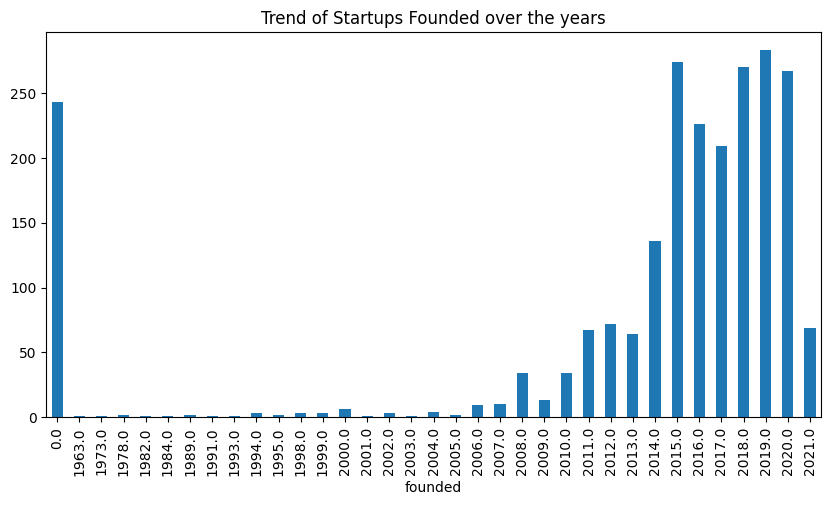

In [107]:
#checking the trend of startups founded over time
(comb_df
 .groupby('founded')
 .founded
 .count()
 .plot(kind='bar',
       figsize= (10,5),
       title = 'Trend of Startups Founded over the years'
       )
)

* The trend of startups shows that there has been increasing number of startups founded over the years and the ecosystem is growing with more than 30% of the startups founded post 2018. 

**1-b: How Much Money has the ecosystem received in funding**

In [108]:
#Total Amount of funding into the Ecosystem
print(f"The Ecosystem has received a total of USD {(comb_df['amount'].sum()):,.0f} in funding over the period.")

The Ecosystem has received a total of USD 279,374,488,215 in funding over the period.


##### **QUESTION 2: How has the Ecosystem changed over time?**

**2-a: How has the performance changed over time**

<Axes: title={'center': 'Trend of funding over the years'}, xlabel='year'>

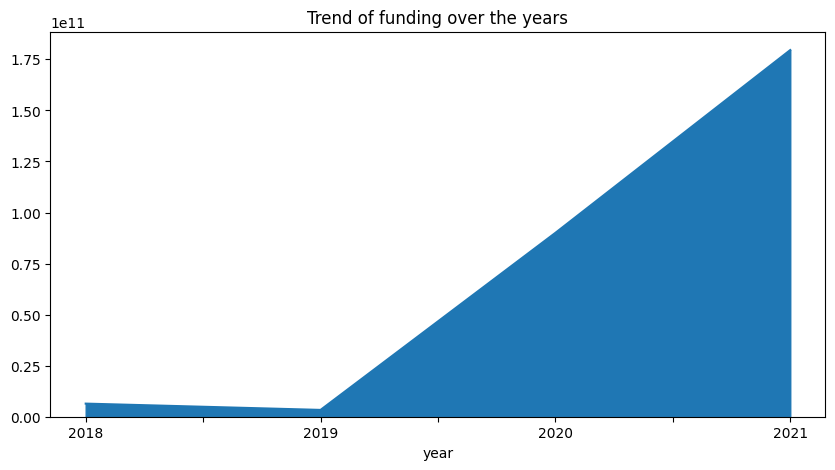

In [109]:
#Trend of the total funding received over the years
(comb_df
 .groupby('year')
 .amount
 .sum()
 .plot(kind='area',
       figsize= (10,5),
       title='Trend of funding over the years'
       )
 )

* The trend looks a bit too steep and sharp, checking into the column

<Axes: >

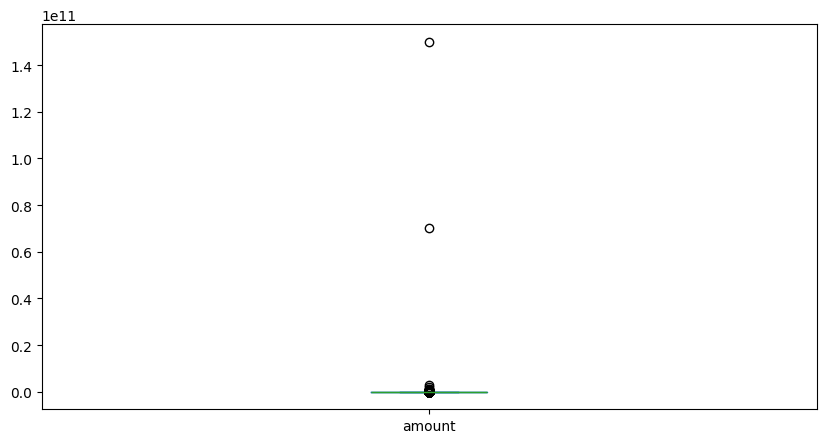

In [110]:
#visual presentation of the column values
(comb_df
 ['amount']
 .plot(kind='box', 
       figsize=(10,5),
       title='')
 )

* There are two outliers in the column

<Axes: xlabel='year', ylabel='amount'>

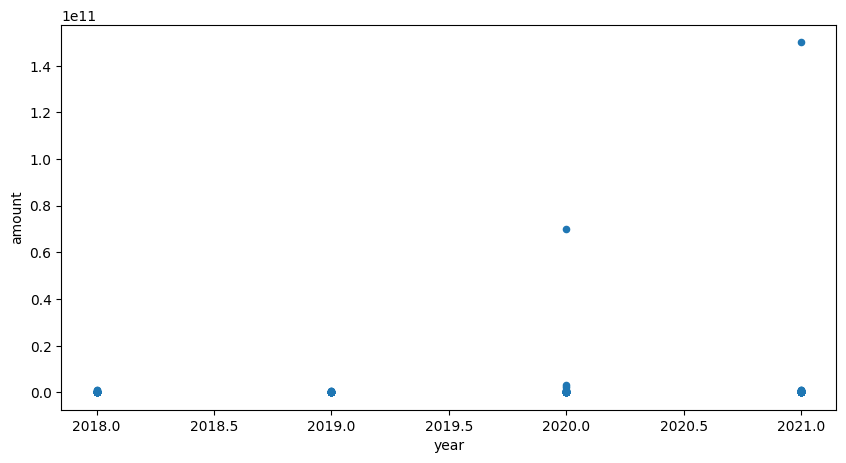

In [111]:
#amounts over the years
(comb_df
 [['amount','year']]
 .plot(kind='scatter',
       x='year', 
       y='amount',
       figsize= (10,5)
       )
 )

* The outliers are from 2020 and 2021
* 2021 had the highest amount of funding received over the period.\ 
The figures are greatly affected by the outliers so we will drop the outliers to check the trend without that exagerrated effect.

<Axes: title={'center': 'Trend of funding over the years, without outliers'}, xlabel='year'>

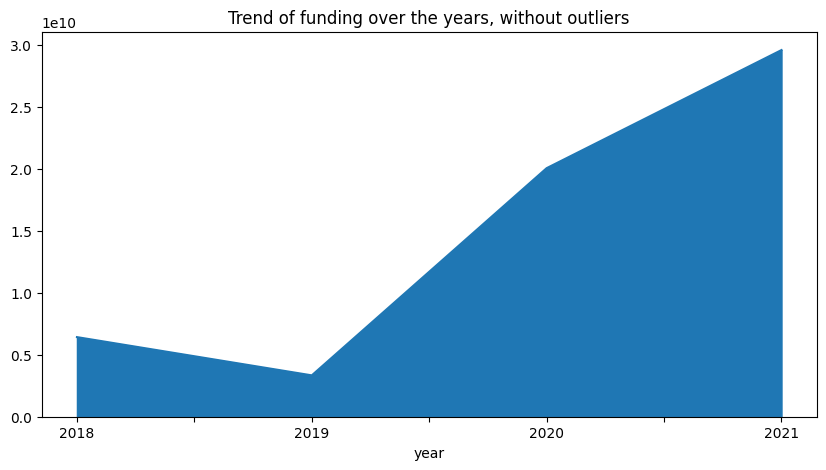

In [112]:
#Dropping the outliers
df1 = comb_df[comb_df.amount < 60000000000]
#plotting without the outliers
(df1
 .groupby('year')
 .amount
 .sum()
 .plot(kind='area',
       figsize= (10,5),
       title='Trend of funding over the years, without outliers',
       )
 )

* The trend even without the outliers shows that the amoutn of funding has been increasing since 2018

<Axes: title={'center': 'Trend of Companies founded over the years'}, xlabel='founded'>

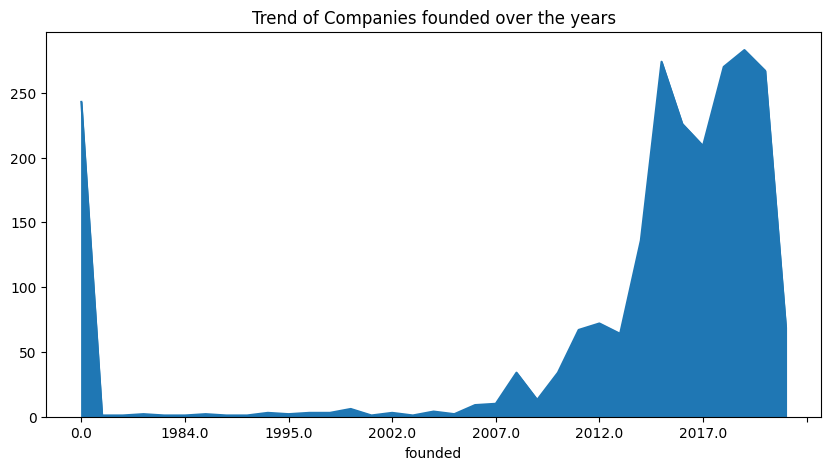

In [139]:
#checking trend of companies founded over the years
(comb_df
 .groupby('founded')
 .company
 .count()
 .plot(kind='area',
       title='Trend of Companies founded over the years',
       figsize=(10,5)
    )
 )

* The trend of companies founded was low but it started growing exponentially from 2007.
* The `0` represents unknown founding dates

**2-b: Which Region has the best performance?**

<Axes: title={'center': 'Number of Startups by region'}, xlabel='location'>

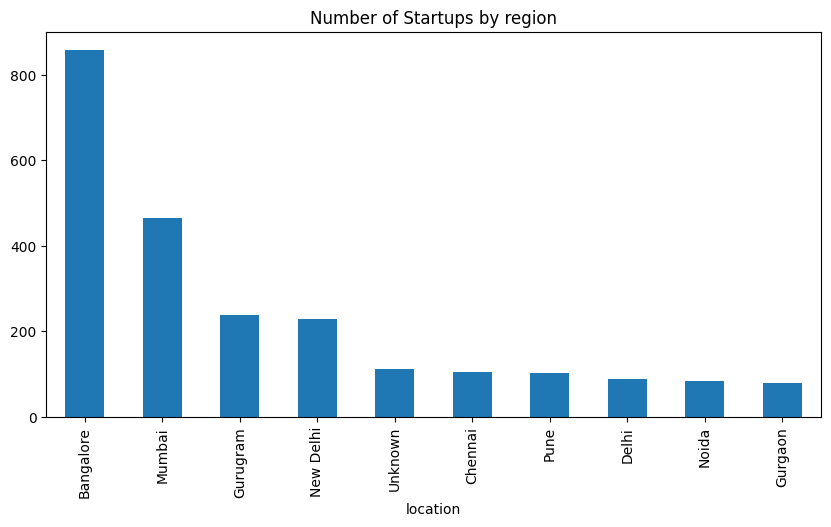

In [113]:
#plotting the region performance
comb_df['location'] = (comb_df
                       ['location']
                       .astype('category')
                       )
top10 = comb_df['location'].value_counts().nlargest(10)
#visual representation of the distribution of startups
top10.plot(kind='bar', 
           title='Number of Startups by region',
           figsize=(10,5))

* Bangalore has the best performance in terms of number of Startups

<Axes: title={'center': 'Region Performance by Amount invested'}, xlabel='location'>

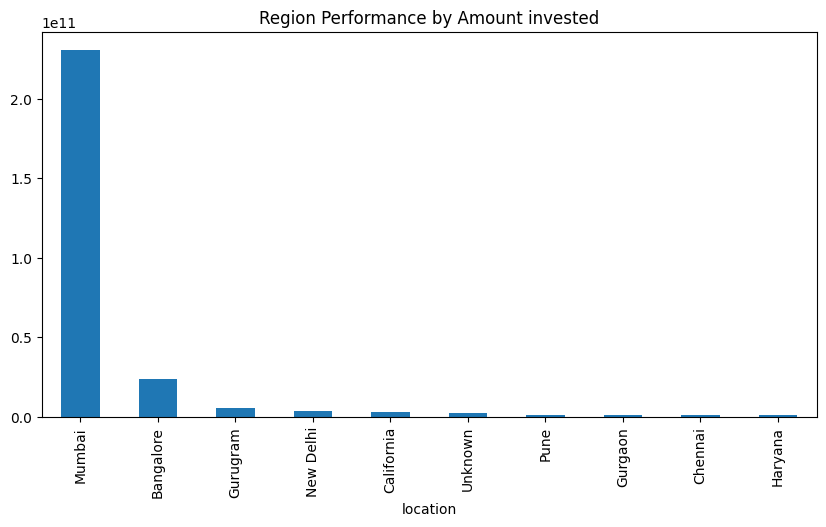

In [114]:
# Performance by amount invested
(comb_df
 .groupby('location')
 .amount
 .sum()
 .nlargest(10)
 .plot(kind='bar', 
       title='Region Performance by Amount invested',
       figsize=(10,5),
       )
 )

* Mumbai has the best performance in terms of amount invested

* In both cases, we see that performance is heavily skewed to a few locations only

##### **QUESTION 3:What is the Success rate of Start-ups in the ecosystem?** 

**3-a: Are there any unicorns in the Ecosystem?**

In [115]:
#Checking for unicorns
#Unicorns are companies valued over 1,000,000,000 $
print(f"There are {comb_df['company'][comb_df['amount'] > 1000000000].count()} unicorns in the Ecosystem.")

There are 4 unicorns in the Ecosystem.


In [116]:
#Checking the unicorns
unicorns = comb_df[comb_df['amount'] > 1000000000]
unicorns

,company,sector,amount,description,year,stage,location,founded,founders,investor
280,Reliance Retail Ventures Ltd,Retail,70000000000.00,Reliance Retail offers online shopping and a c...,2020,Unknown,Mumbai,2006.00,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"
317,Snowflake,Tech company,3000000000.00,Snowflake is a cloud data platform that provid...,2020,Unknown,California,2012.00,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...","Salesforce Ventures, Dragoneer Investment Group"
328,Reliance,Multinational conglomerate company,2200000000.00,Reliance owns businesses across India engaged ...,2020,Unknown,Mumbai,1973.00,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake"
73,Alteria Capital,FinTech,150000000000.00,Alteria Capital is a Venture debt firm .,2021,Debt,Mumbai,2018.00,Vinod Murali,Unknown


* The 4 unicorns are Reliance Retail, Snowflake, Reliance and Alteria Capital.

In [117]:
#plotting the unicorns in their sectors
unicorns['amount'] = unicorns['amount'] / 1000000000 #dividing by 1Billion for readability
unicorns = unicorns.sort_values('amount').reset_index() #setting the amount as index for ordering

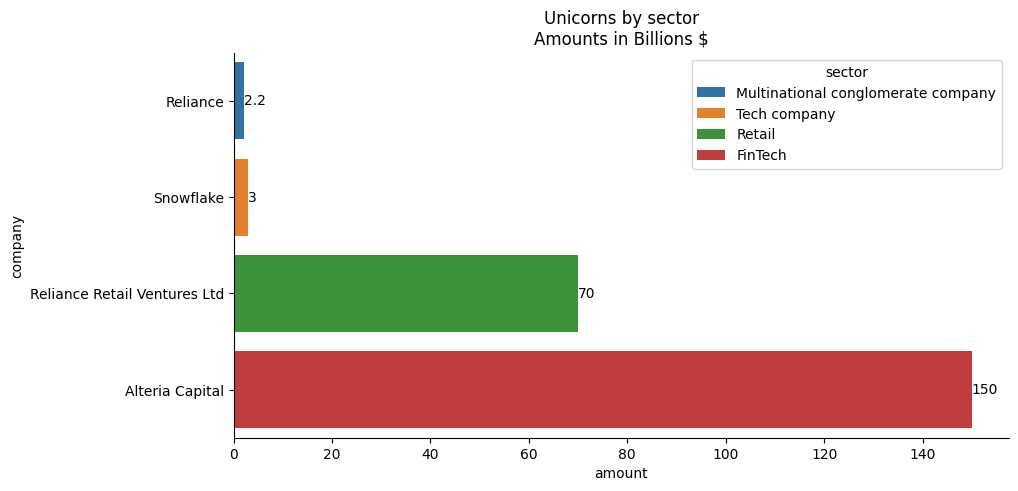

In [118]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=unicorns, y='company', x='amount', hue='sector')
sns.despine(left=False, bottom=False) #removing right and top borders
for i in ax.containers:
      ax.bar_label(i,) #adding bar labels
plt.title(f'Unicorns by sector\nAmounts in Billions $')
plt.show()

In [119]:
#checking how much they contribute to the value of the Ecosystem
#unicorn funding
unicorns = (comb_df
            ['amount']
            [comb_df['amount'] > 1000000000]
            .sum()
            )
#total ecosystem funding
total = (comb_df
         ['amount']
         .sum()
         )
#percentage of funding attributed to unicorns
unicorn_perc = (unicorns/(unicorns + total)) * 100
print(f"The unicorns' funding accounts for {unicorn_perc:,.2f} % of the funding to the Ecosystem")

The unicorns' funding accounts for 44.63 % of the funding to the Ecosystem


In [120]:
#checking unicorn percentage in number of companies funded
uni = comb_df[comb_df['amount'] > 1000000000].company.count()
non_uni = comb_df[(comb_df['amount']<1000000000) & (comb_df['amount']>0)].company.count()

print(f"Unicorns account for {(uni/(non_uni+uni))*100:.2f} % of all the companies in the Ecosystem")


Unicorns account for 0.17 % of all the companies in the Ecosystem


* This percentage of unicorns in the ecosystem is less than 1% but accounts for over 44% of total funding received.

In [121]:
#total number of deals made in the ecosystem
comb_df['amount'].count()

2843

##### **QUESTION 4: Who is already in the Ecosystem?**

**4-a: How Many investors are in the Ecosystem?**

In [123]:
print(f"There are {comb_df['investor'].nunique()} investors")

There are 1765 investors


In [124]:
#ratio of investors to companies in the Ecosystem
print(f"The overall ratio of investors to companies is {(comb_df['investor'].nunique())/(comb_df['company'].nunique()):.2f}")

The overall ratio of investors to companies is 0.80


* The overall ratio of investors to companies is almost 1 to 1 which shows great confidence in the Ecosystem by investors

<Axes: title={'center': 'Top Investors in the Ecosystem by number of times invested'}, xlabel='investor'>

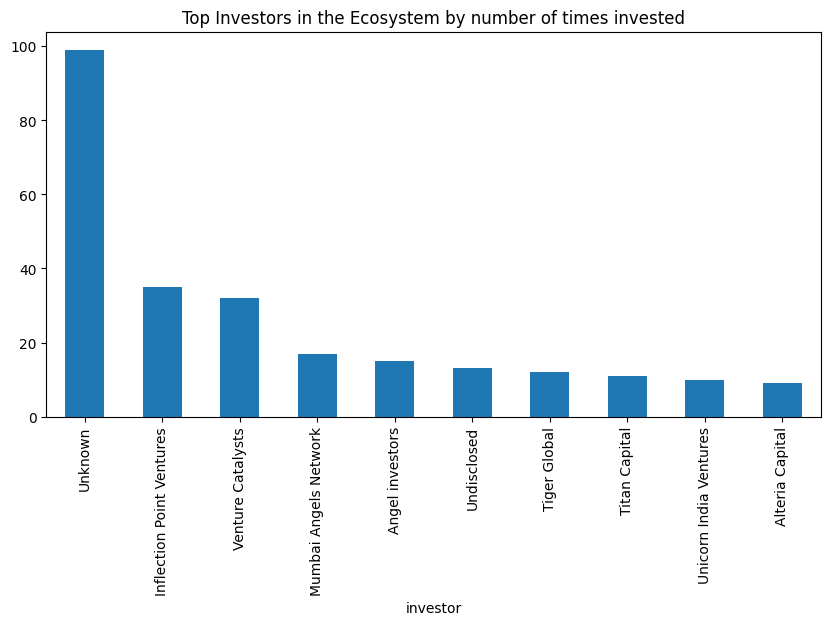

In [125]:
#Checking investors in the Ecosystem
(comb_df
 ['investor']
 .value_counts()
 .nlargest(10)
 .plot(kind='bar', 
       figsize=(10,5), 
       title='Top Investors in the Ecosystem by number of times invested')
 )

* The unknown comes from missing data, This could be from the fact that the data was not collected in 2018 and is a point of concern to be adressed in future iterations.

<Axes: title={'center': 'Top Investors by amount invested'}, ylabel='investor'>

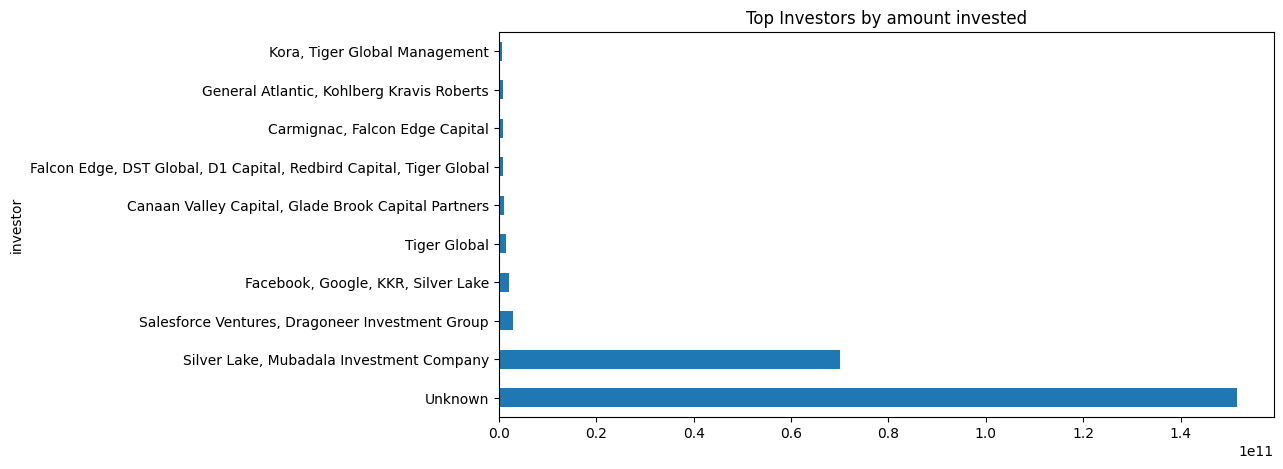

In [126]:
# checking Top investors by amount invested
top_inv = (comb_df
           .groupby('investor')
           .amount
           .sum()
           .nlargest(10)
           .plot(kind='barh',
                 figsize=(10,5),
                 title='Top Investors by amount invested')
           )
top_inv

**4-b: Which Sectors are they invested in?**

<Axes: title={'center': 'Top Sectors by Number of Investors'}, xlabel='sector'>

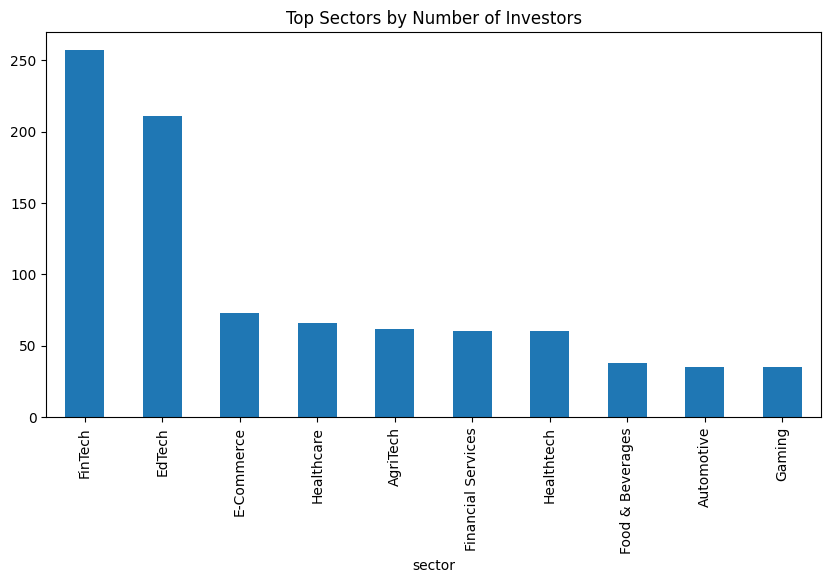

In [127]:
#plotting the Number of investors by sector
(comb_df
 .groupby('sector') #grouping by sector
 .investor
 .count() #counting the number of investors
 .nlargest(10) #limiting to the top 10 sectors
 .plot(kind='bar', 
       figsize=(10,5),
       title='Top Sectors by Number of Investors'
       )
 )

* The majority of investors have invested in the FinTech space, followed by Edtech and Ecommerce respectively. 

##### **QUESTION 5: Which is the best performing sector in the Ecosystem?**

**5-a: Sector with the most Start-ups**

<Axes: title={'center': 'Number of Companies by Sector of operation'}, xlabel='sector'>

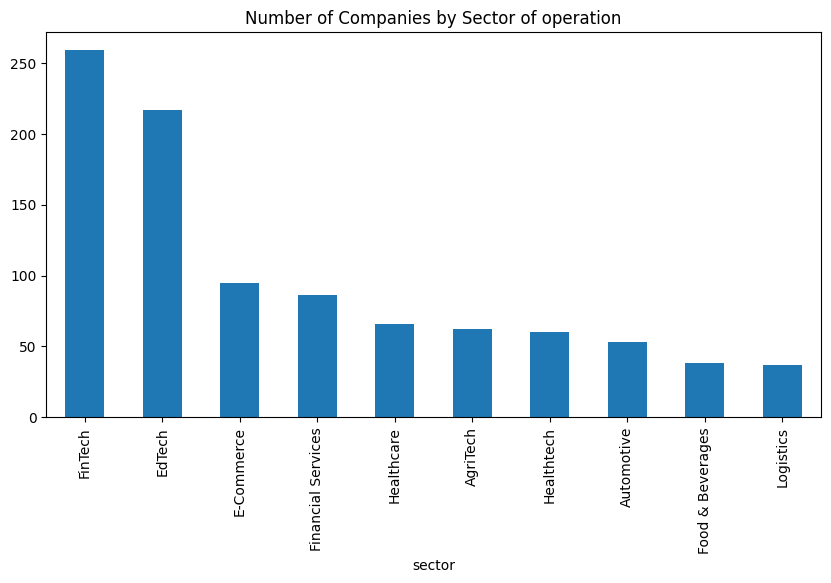

In [128]:
#Plotting the number of companies in the various sectors
(comb_df
 .groupby('sector')
 .company
 .count()
 .nlargest(10)
 .plot(kind='bar',
       figsize= (10,5),
       title = 'Number of Companies by Sector of operation'
       )
 )

**Observations:**
1. The Fintech Sector has the highest number of startups in the ecosystem.
2. We see Edtech has the second highest number of startups giving even more strength to our initial observation of it being undervalued and potentially a great prospect for investment. 
3. The same applies to Ecommerce, Automotive and Food Sectors. They have a high number of startups but the funding is relatively low.

**5-b: Sector with the highest amount raised**

<Axes: title={'center': 'Top Sectors by Amount Invested'}, xlabel='sector'>

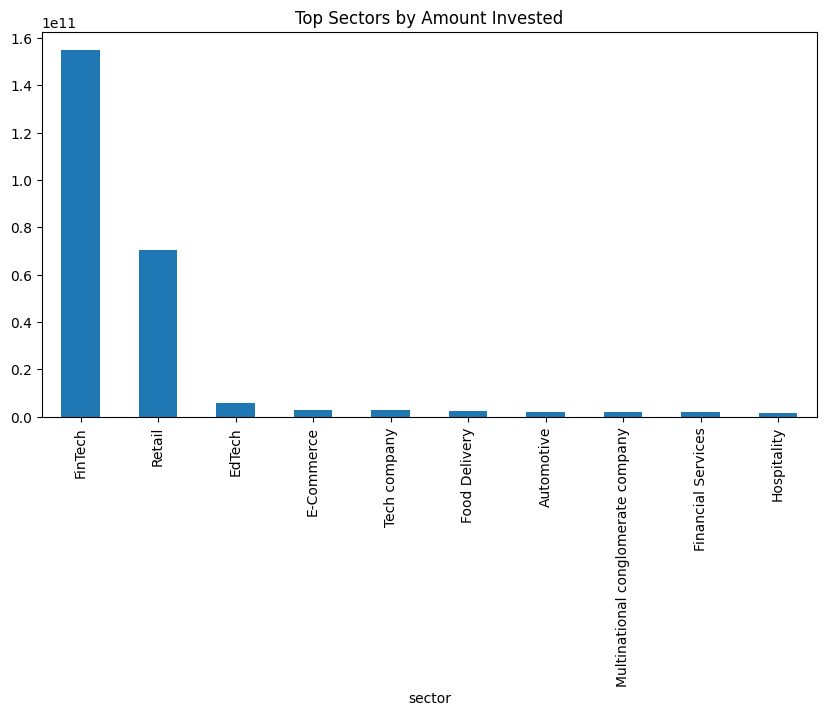

In [129]:
#Plotting top 10 sectors by amount invested
(comb_df
 [['sector','amount']]
 .groupby('sector')
 .amount
 .sum() 
 .nlargest(10)
 .plot(kind='bar',
       figsize=(10,5),
       title= 'Top Sectors by Amount Invested'
       )
 )

**Observations:** 
1. The most funding has gone to FinTech , followed by Retail and Edtech respectively.
2. Retail has second highest funding even though it did not appear in the top 10 sectors with the highest number of investors. This is probably because of the presence of the Unicorn
3. EdTech has low funding despite having the second highest number of investors involved. This is potentially an undervalued sector and could likely provide the next unicorn.

## **CONCLUSION**

After our analysis, and observation, it is evident that the Indian Startup Ecosystem is in fairly good shape as evidenced by a consistent number of new startups being formed, a very high ratio of investors to companies and the presence of 4 unicorns. 
These observations validate our null hypothesis that the Ecosystem is Healthy and worth looking into for investment. 
However, the ecosystem also appears to be quite young as evidenced by the fact that most companies were founded from 2007 and that the Investment

## **RECOMMENDATION**